<b><font size="6">|Application Report|LogisticRegression|Credit Default Prediction</font></b>

* **Author**: Marcel De Lange
* **Student ID**: 577610
* **Date:**: 26-July-2024 - 28 July 2024

# Problem Formulation 
Can we reliably predict whether a customer is likely to default or not? 

Features

LIMIT   : Amount of the given credit (in dollars), including both individual consumer credit and family (supplementary) credit
SEX     : Gender of the credit card holder

1 = male

2 = female


EDUCATION: Educational level of the credit card holder

1 = graduate school

2 = university

3 = high school

4 = other


MARRIAGE : Marital status of the credit card holder

1 = married

2 = single

3 = others


AGE     : Age of the credit card holder (in years)
PAY_0 to PAY_6: History of past payment. The measurement scale for the repayment status is:

-1 = pay duly

1 = payment delay for one month

2 = payment delay for two months
...
8 = payment delay for eight months

9 = payment delay for nine months and above


BILL_AMT1 to BILL_AMT6: Amount of bill statement (in dollars) for the past 6 months

PAY_AMT1 to PAY_AMT6: Amount of previous payment (in dollars) for the past 6 months



# Dataset Source
Link :

https://archive.ics.uci.edu/dataset/350/default+of+credit+card+clients

# Import Libraries 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score




# Load the dataset

In [2]:
df=pd.read_csv("creditcard.ipynb (df).csv")

# Inspect the Data 

In [3]:
df.head()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


# Inspect Dataframe Information

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Unnamed: 0  30000 non-null  int64
 1   X1          30000 non-null  int64
 2   X2          30000 non-null  int64
 3   X3          30000 non-null  int64
 4   X4          30000 non-null  int64
 5   X5          30000 non-null  int64
 6   X6          30000 non-null  int64
 7   X7          30000 non-null  int64
 8   X8          30000 non-null  int64
 9   X9          30000 non-null  int64
 10  X10         30000 non-null  int64
 11  X11         30000 non-null  int64
 12  X12         30000 non-null  int64
 13  X13         30000 non-null  int64
 14  X14         30000 non-null  int64
 15  X15         30000 non-null  int64
 16  X16         30000 non-null  int64
 17  X17         30000 non-null  int64
 18  X18         30000 non-null  int64
 19  X19         30000 non-null  int64
 20  X20         30000 non-null  

# Format Coloum Names 

In [5]:
# # Rename the columns
df.columns = ['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default_payment_next_month']

# Display the first few rows of the dataset
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


# Exploratory Data Analysis

# View the descriptive statistics

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,30000.0,15000.500000,8660.398374,1.0,7500.75,15000.5,22500.25,30000.0
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_0,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0


# Define Features and Output Varaibles 

In [7]:
# Define Features and Output Varaibles

X = df.drop('default_payment_next_month', axis=1)
y = df['default_payment_next_month']

# Display the first few rows of the features

X.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,1,20000,2,2,1,24,2,2,-1,-1,...,689,0,0,0,0,689,0,0,0,0
1,2,120000,2,2,2,26,-1,2,0,0,...,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,3,90000,2,2,2,34,0,0,0,0,...,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,4,50000,2,2,1,37,0,0,0,0,...,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,5,50000,1,2,1,57,-1,0,-1,0,...,35835,20940,19146,19131,2000,36681,10000,9000,689,679


# Box plot of features

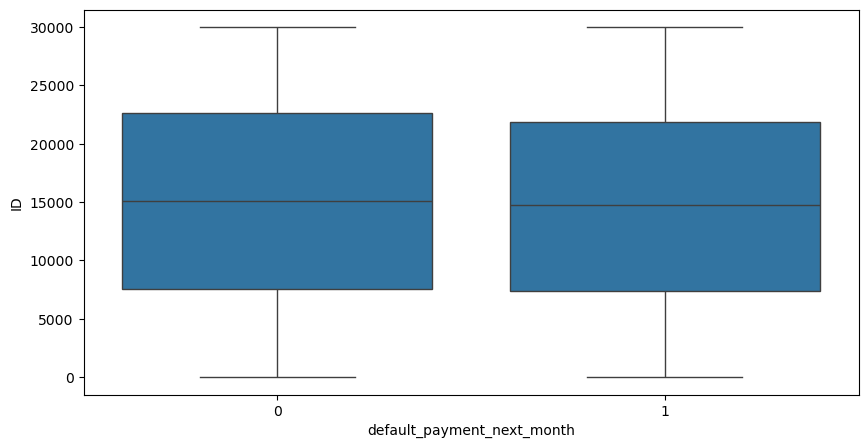

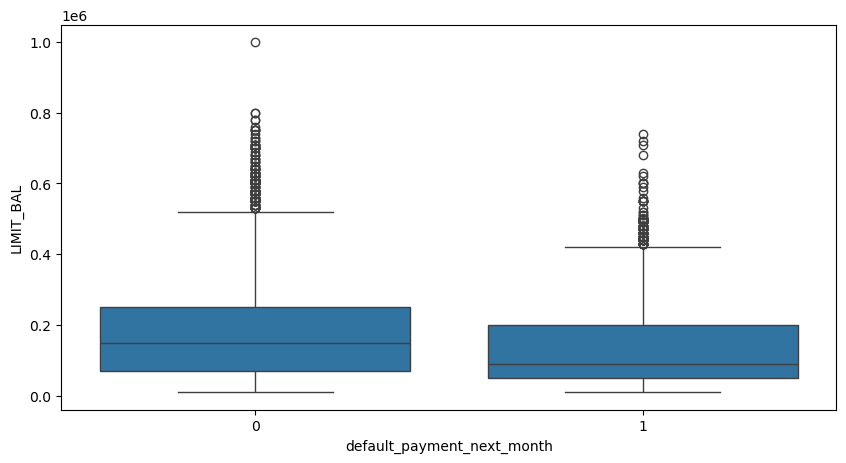

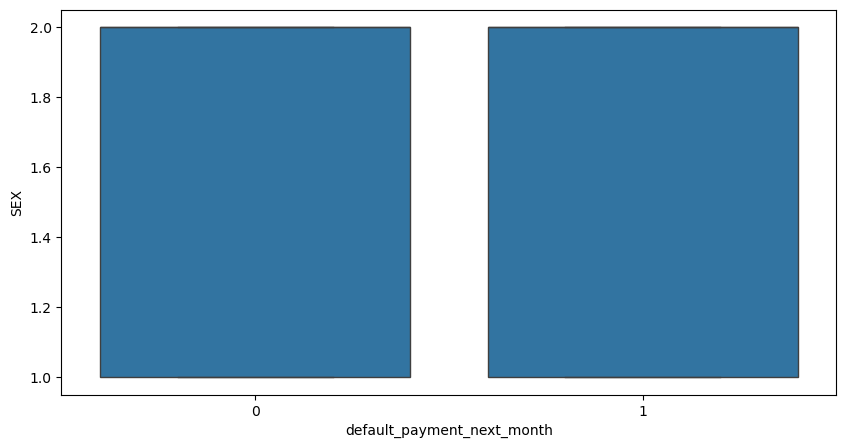

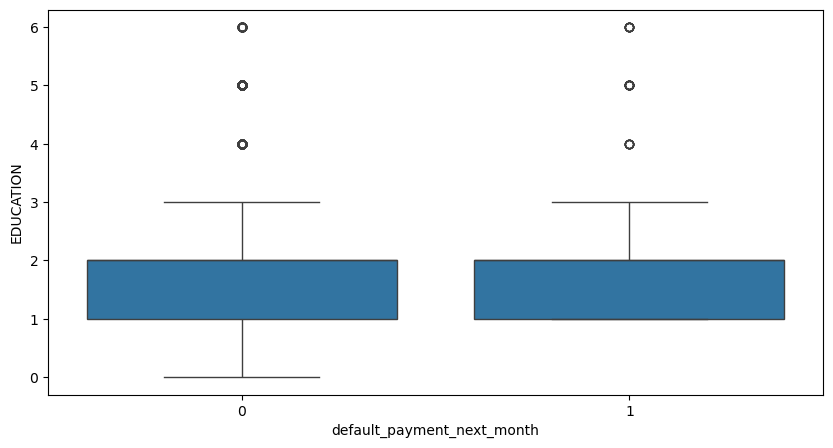

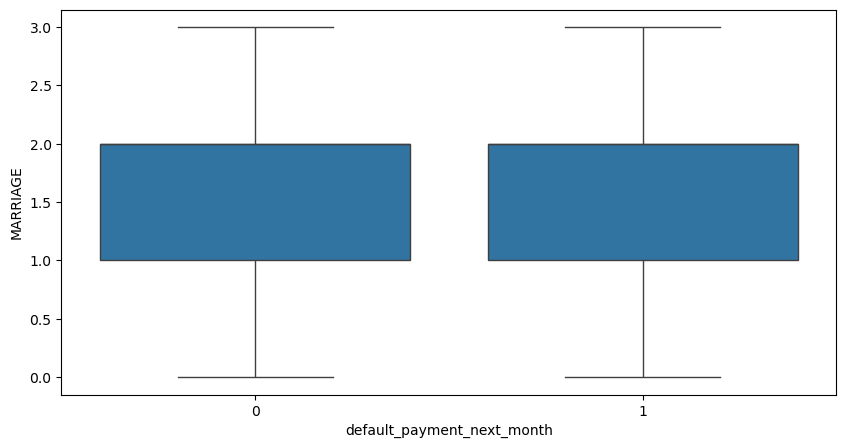

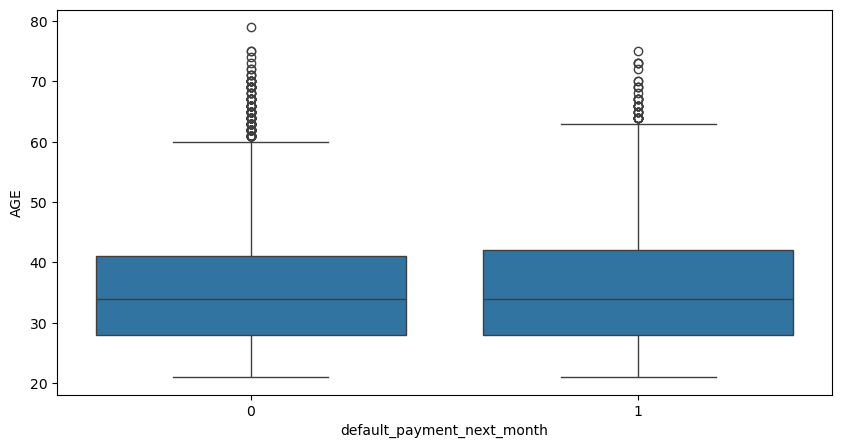

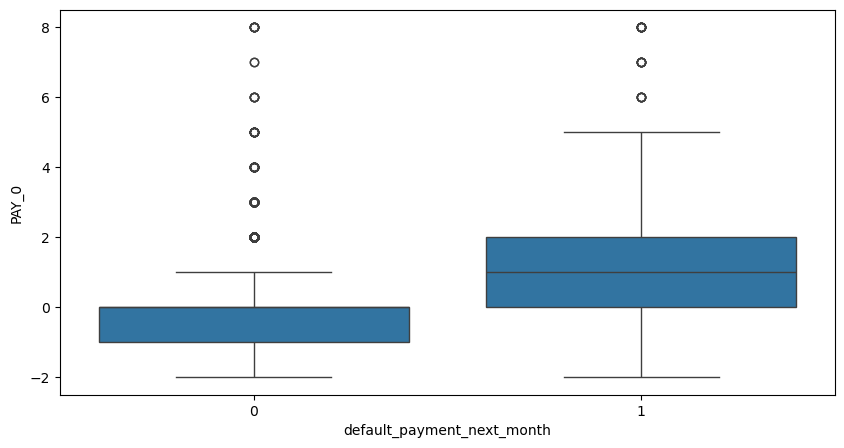

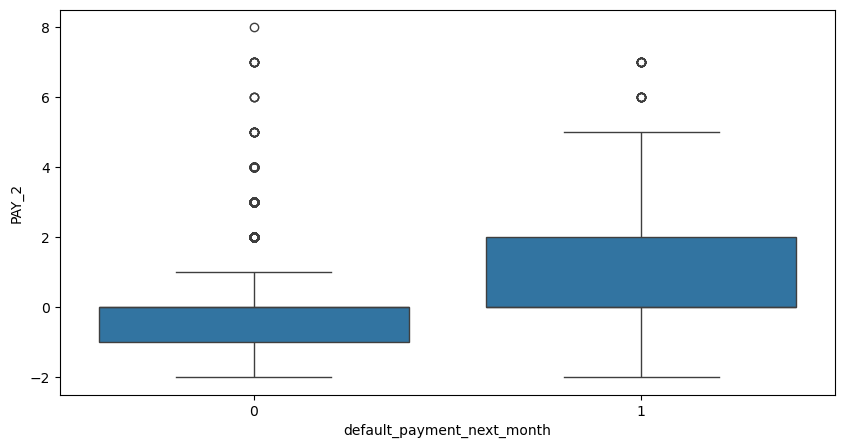

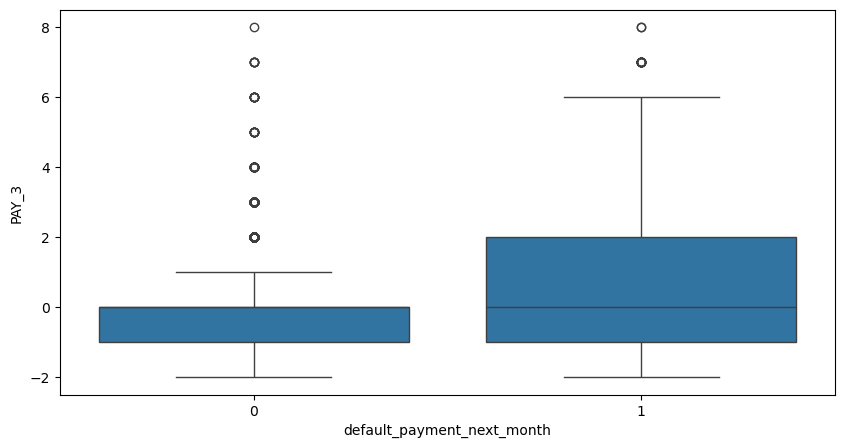

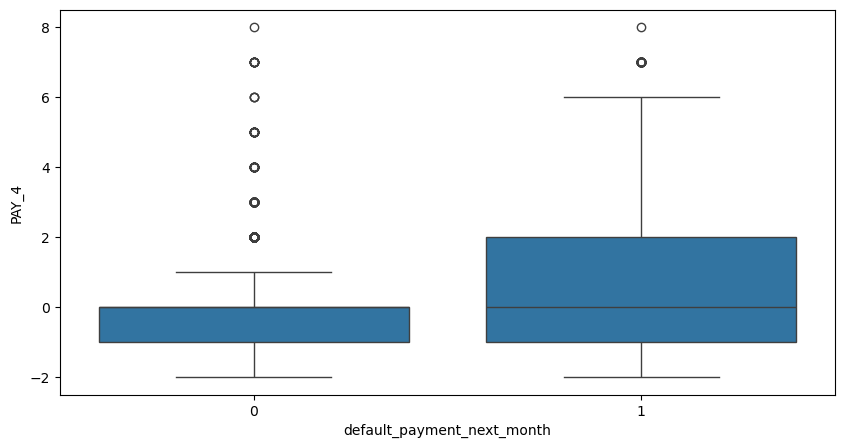

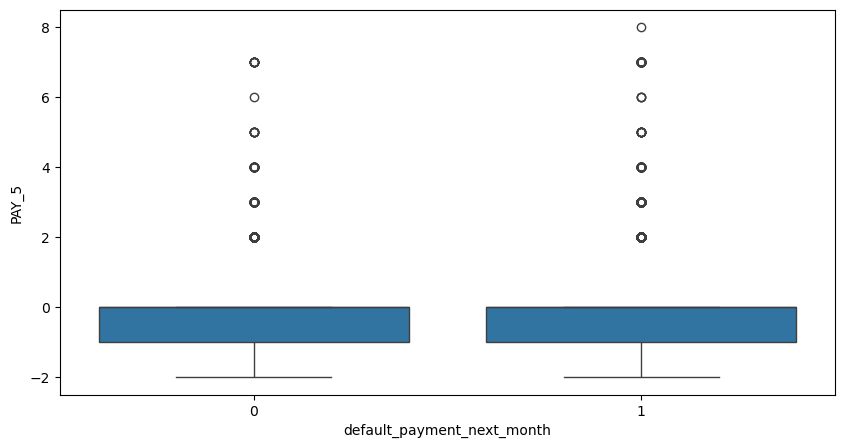

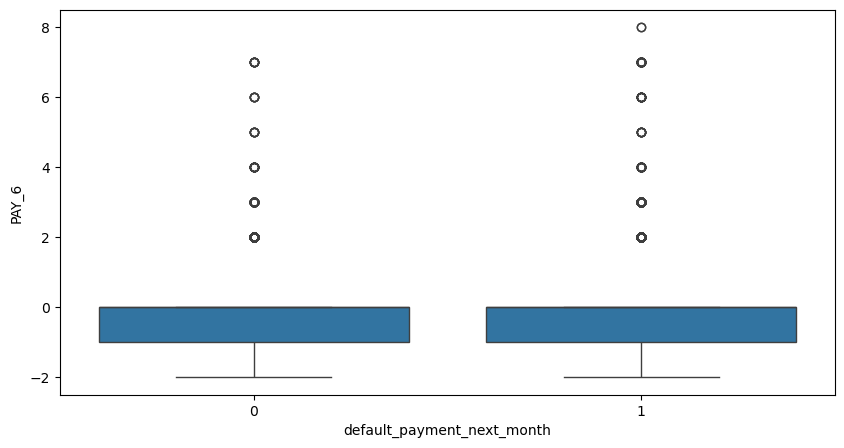

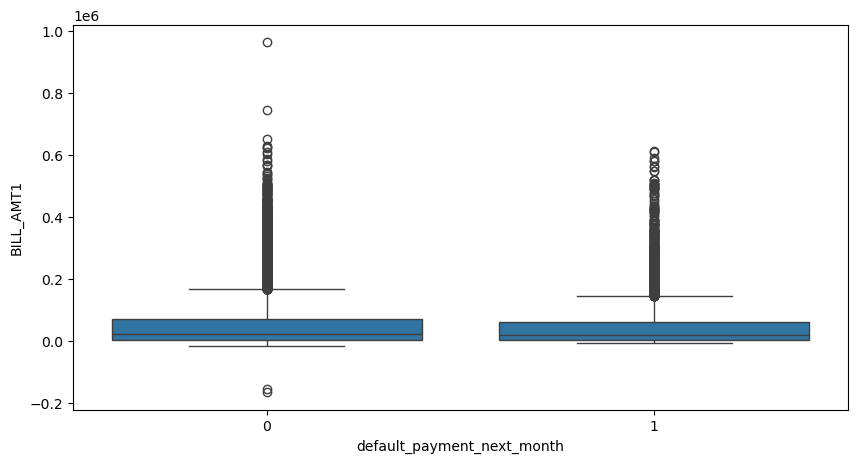

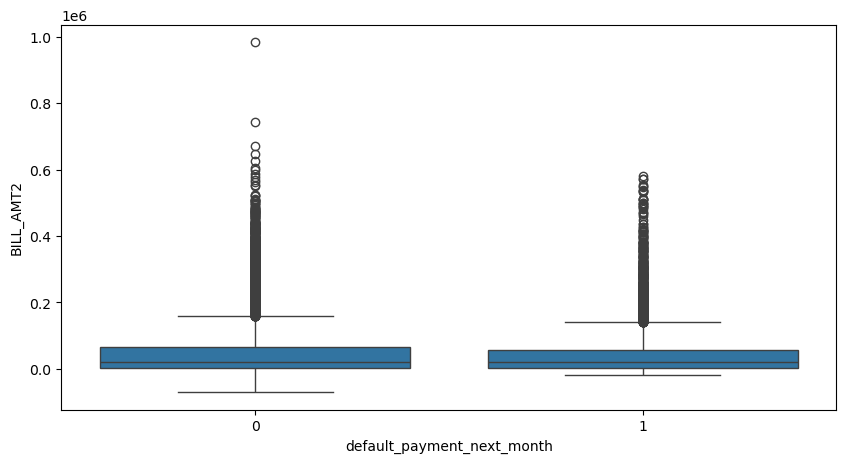

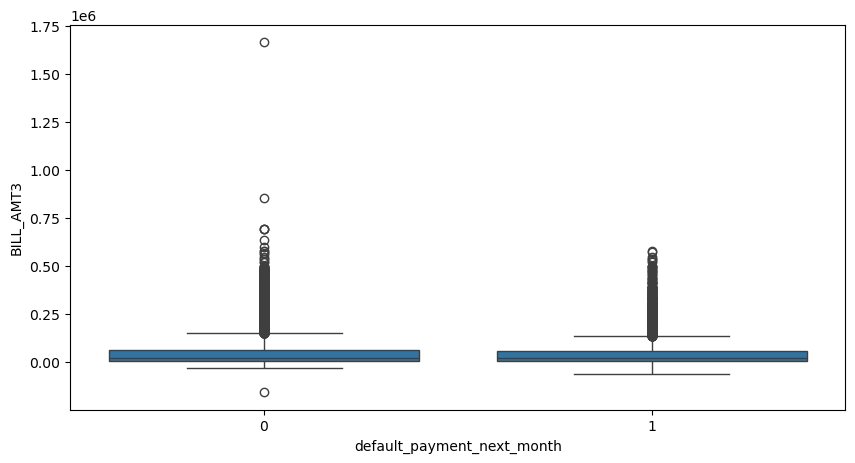

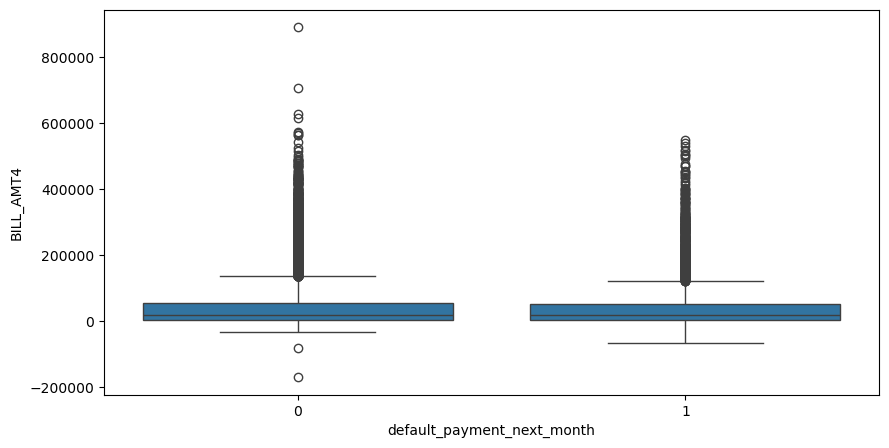

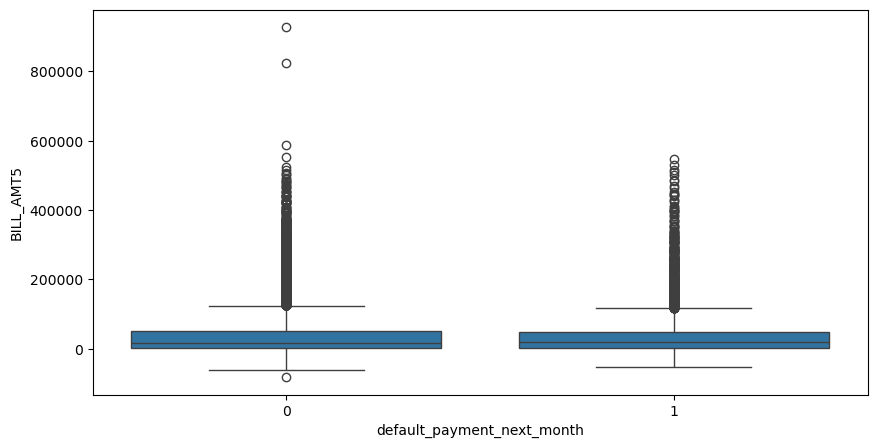

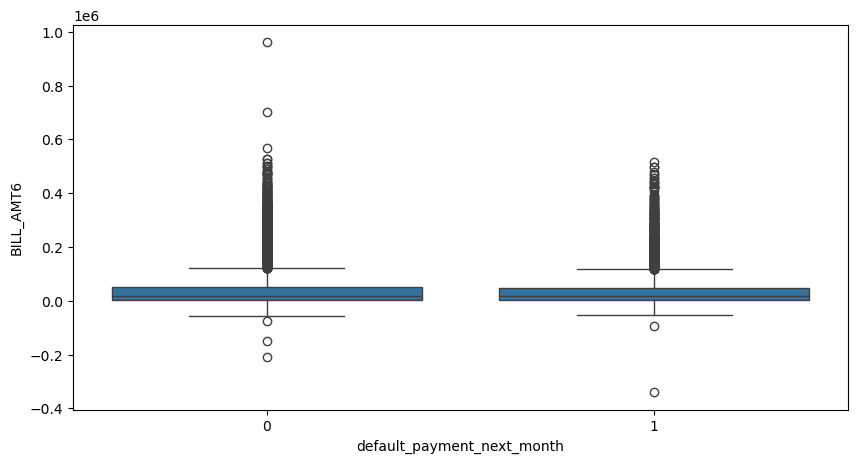

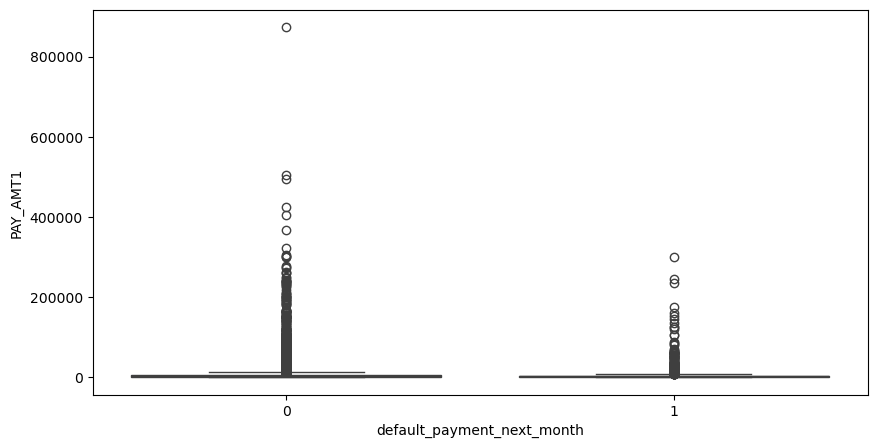

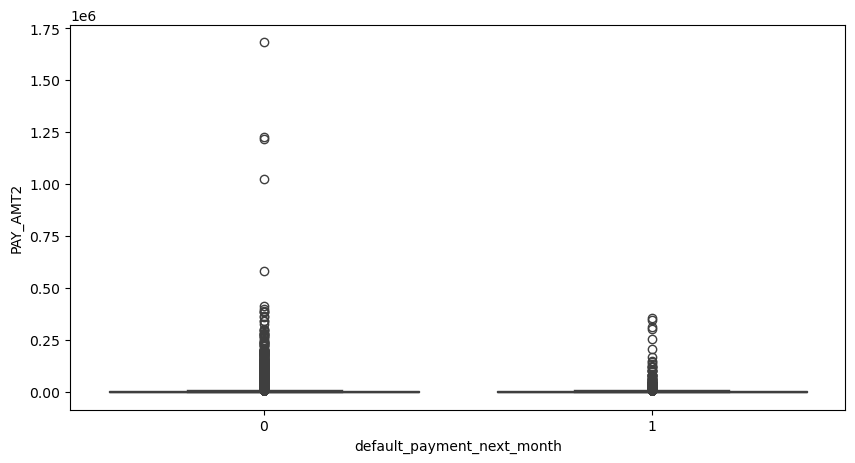

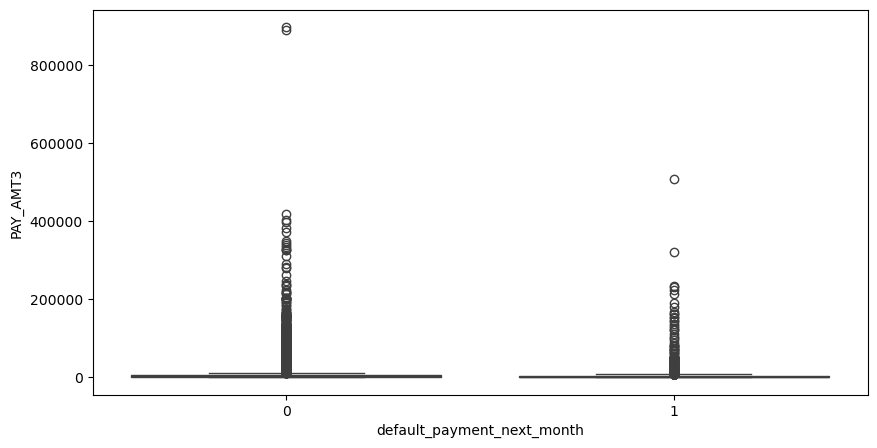

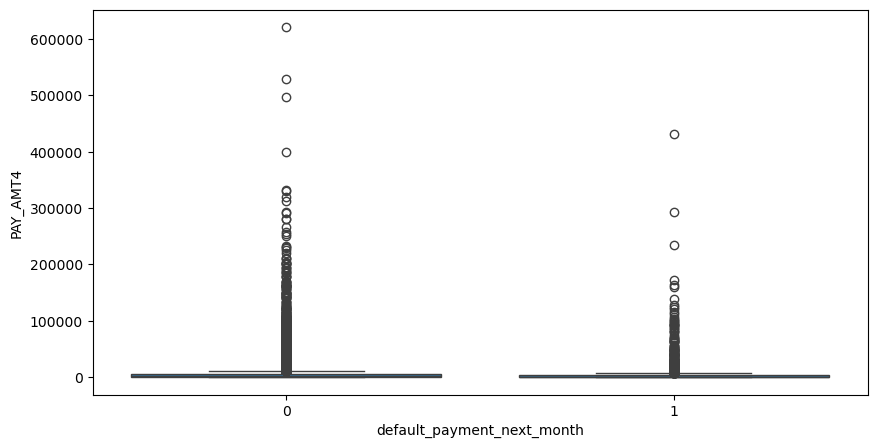

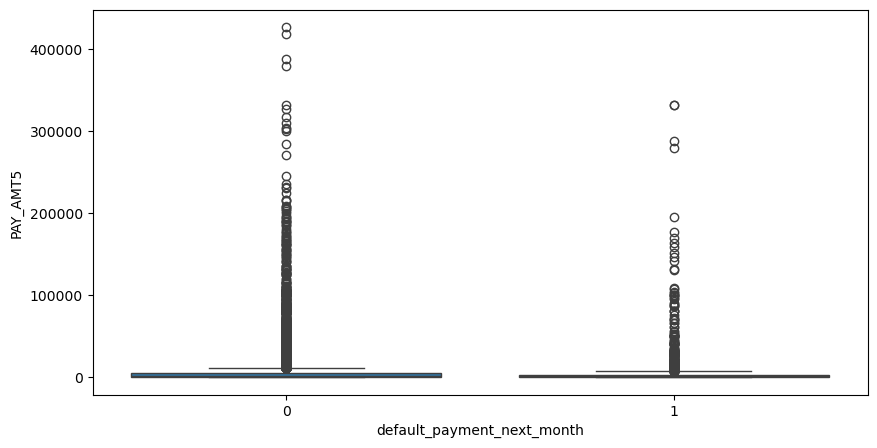

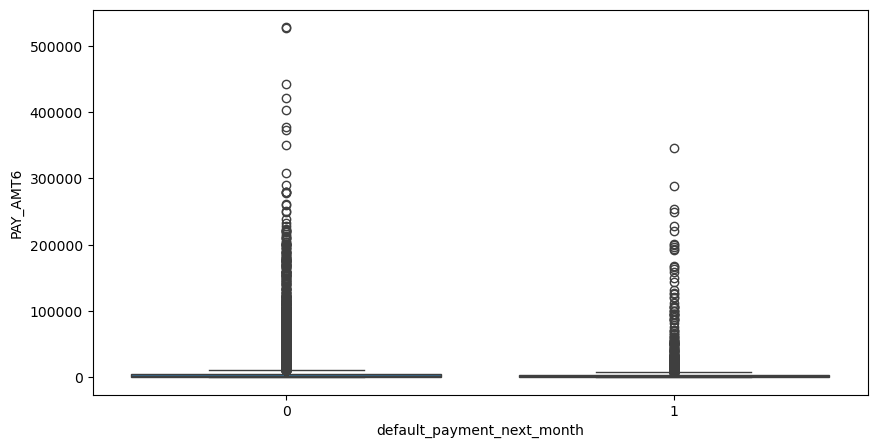

In [8]:
# Boxplot of features

for column in X.columns:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=y, y=column, data=X)
    plt.show()
    #what does the boxplot show in this context
    # Box plot shows the distribution of a numerical variable across the two categories of the target variable. 
    # In this case, the box plot shows the distribution of the numerical variable (LIMIT_BAL, AGE, etc.) across the two categories (default_payment_next_month) 
    # - those who defaulted and those who didn't.
    

In [9]:
# Scale an appriopaite feature that needs scaling

# Scale the AGE feature

scaler = StandardScaler()
X['AGE'] = scaler.fit_transform(X[['AGE']])

X.head()







,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,1,20000,2,2,1,-1.246020,2,2,-1,-1,...,689,0,0,0,0,689,0,0,0,0
1,2,120000,2,2,2,-1.029047,-1,2,0,0,...,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,3,90000,2,2,2,-0.161156,0,0,0,0,...,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,4,50000,2,2,1,0.164303,0,0,0,0,...,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,5,50000,1,2,1,2.334029,-1,0,-1,0,...,35835,20940,19146,19131,2000,36681,10000,9000,689,679


# reason why age was scaled:

#how was age scaled:

#In this context of the 'AGE' feature, 
a negative value indicates that the corresponding age is below the mean age of the dataset. 

# Display a single boxplot after the scaled feature

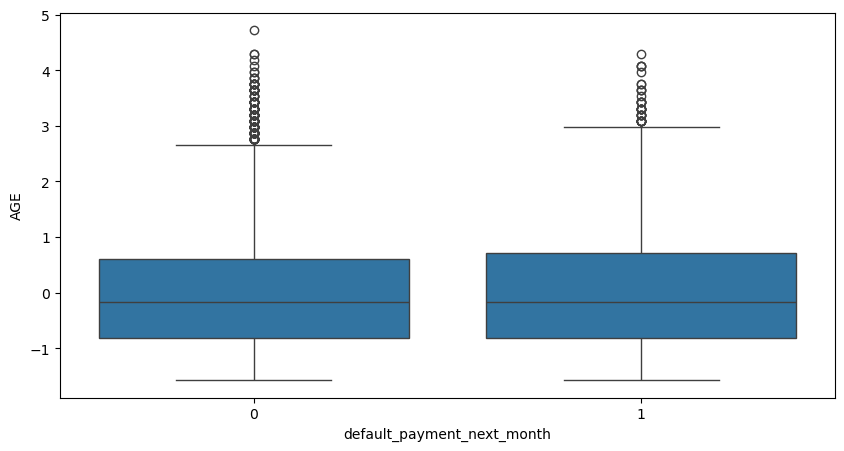

In [10]:


plt.figure(figsize=(10, 5))
sns.boxplot(x=y, y='AGE', data=X)
plt.show()
# what does this boxplot show us:

# The boxplot shows the distribution of the AGE feature (scaled) across the two categories (default_payment_next_month).


# Histogram Plots of all the data

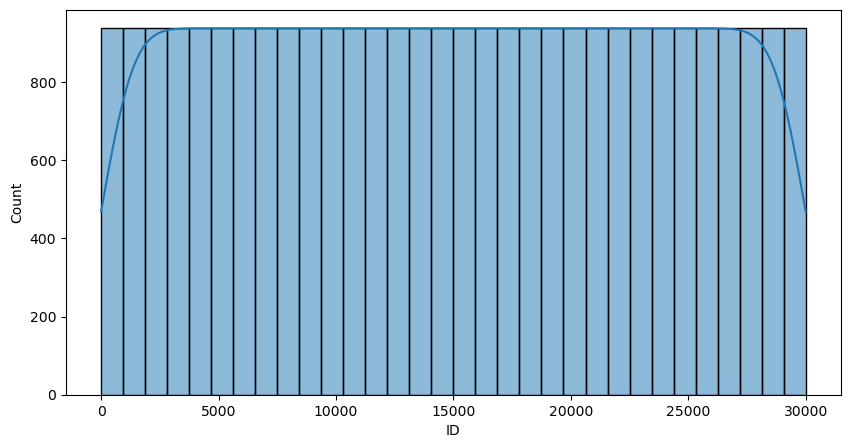

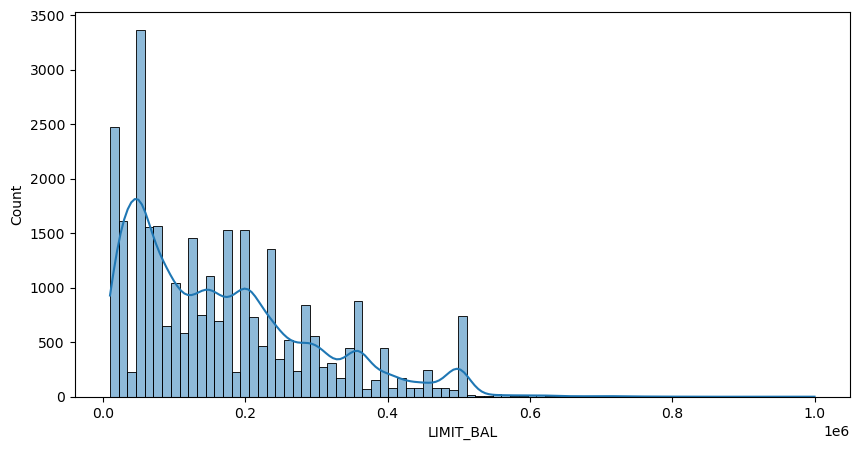

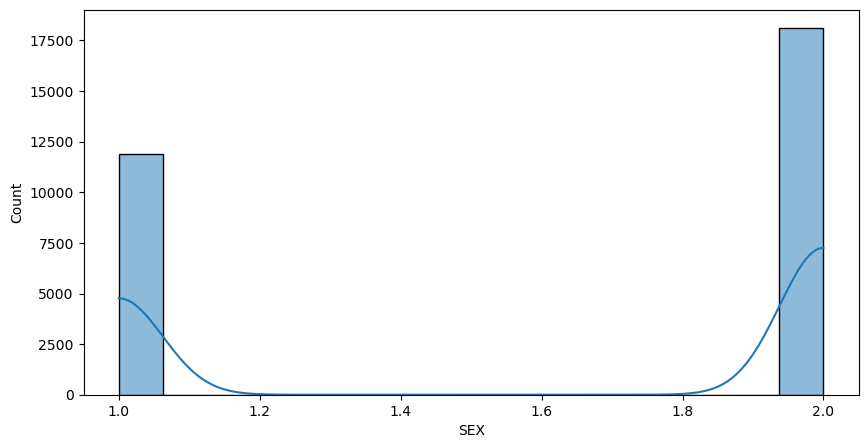

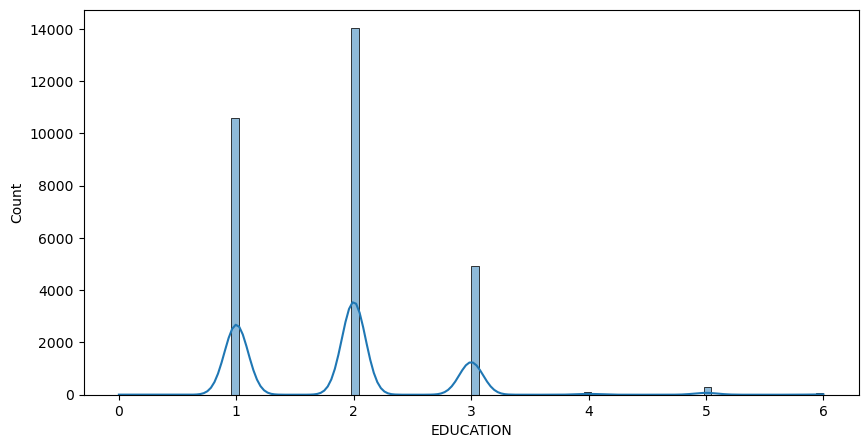

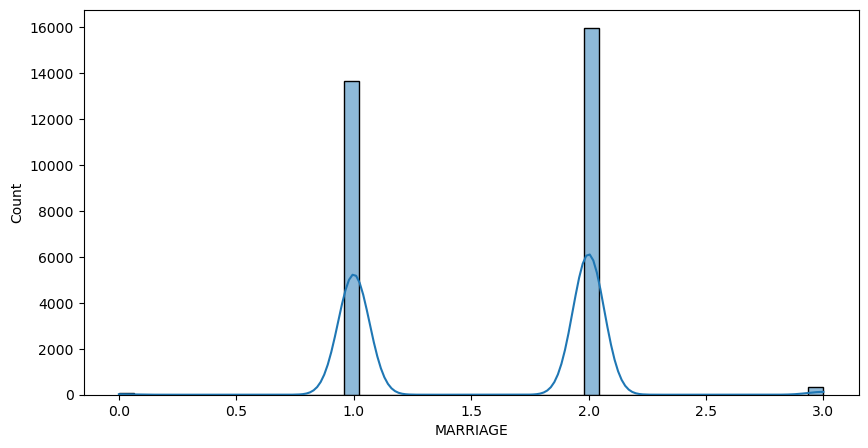

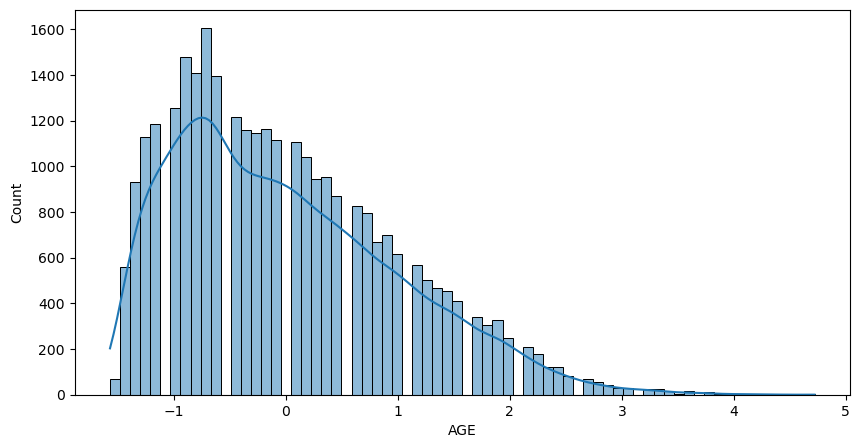

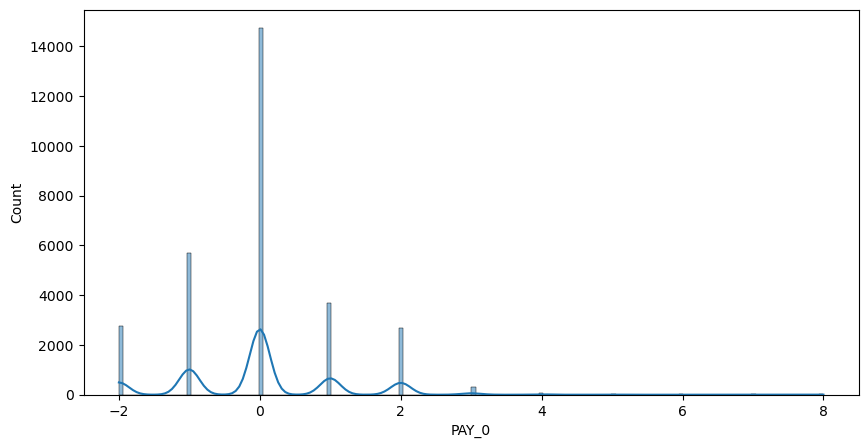

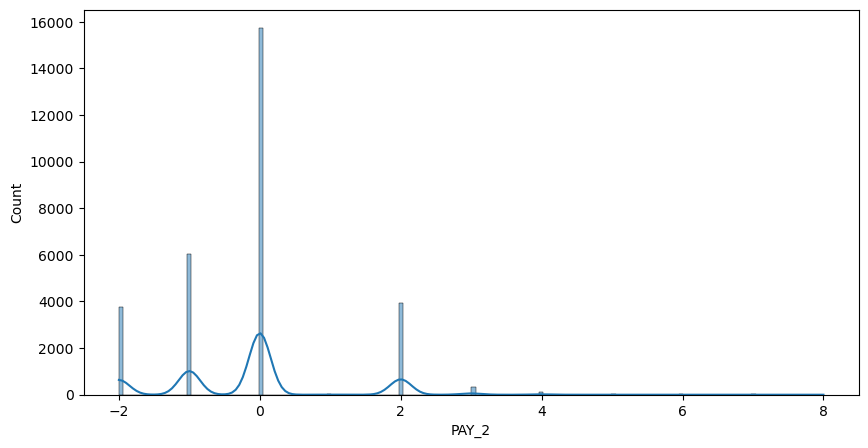

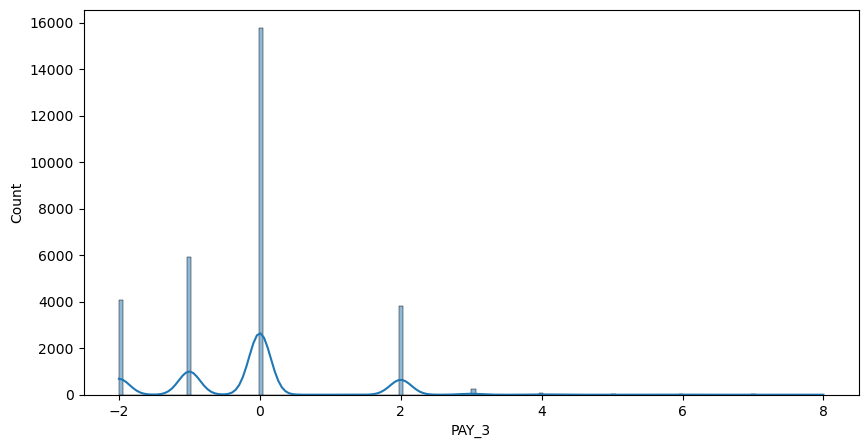

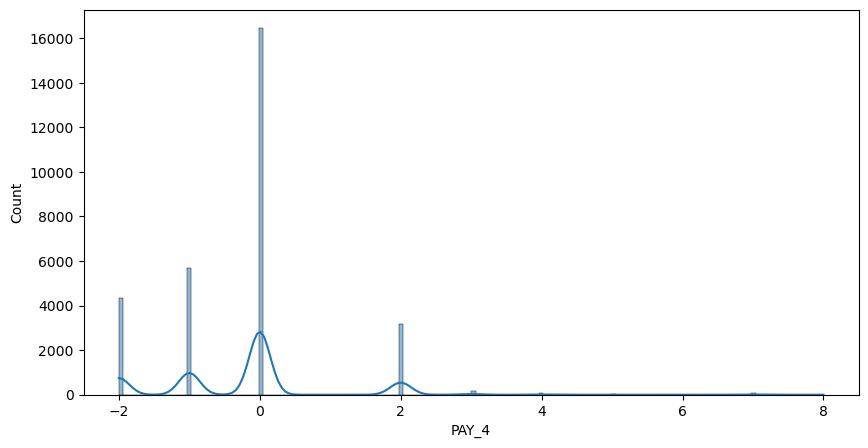

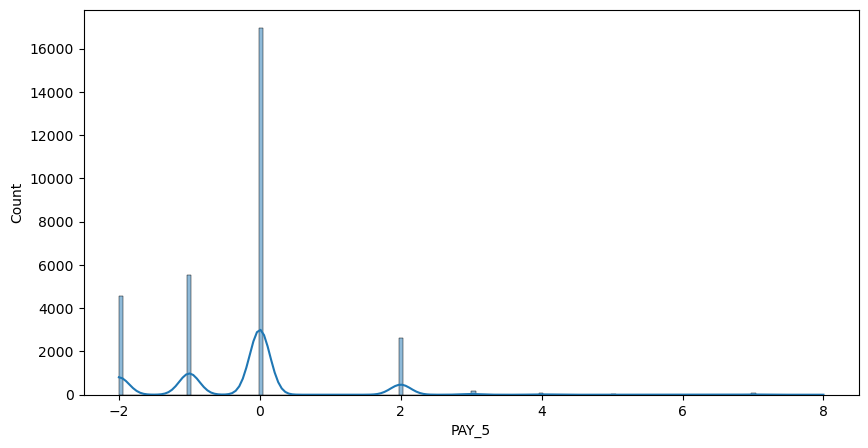

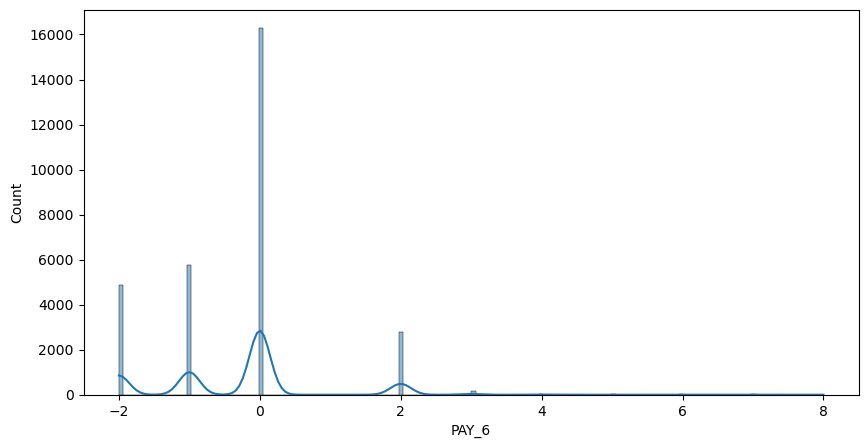

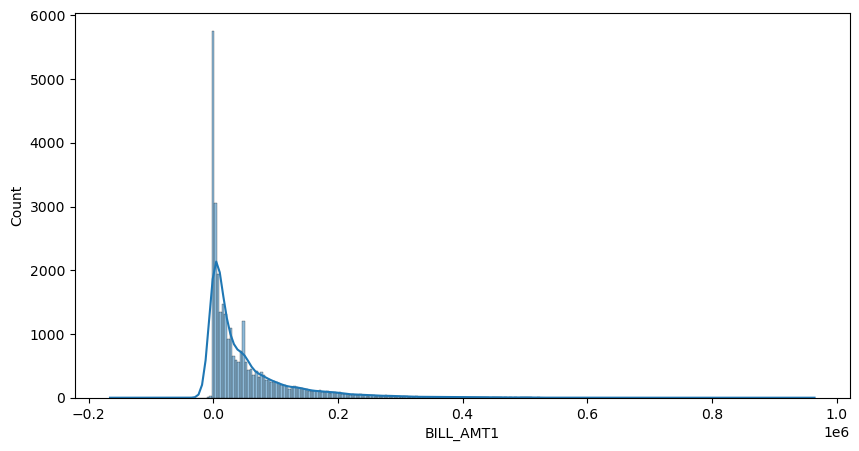

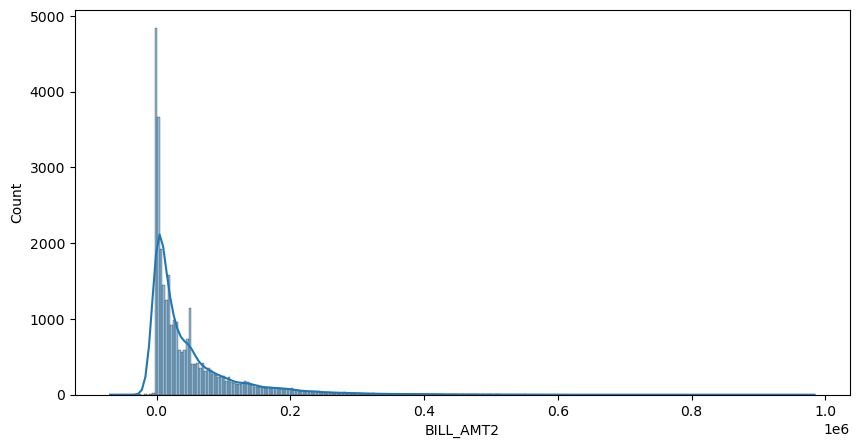

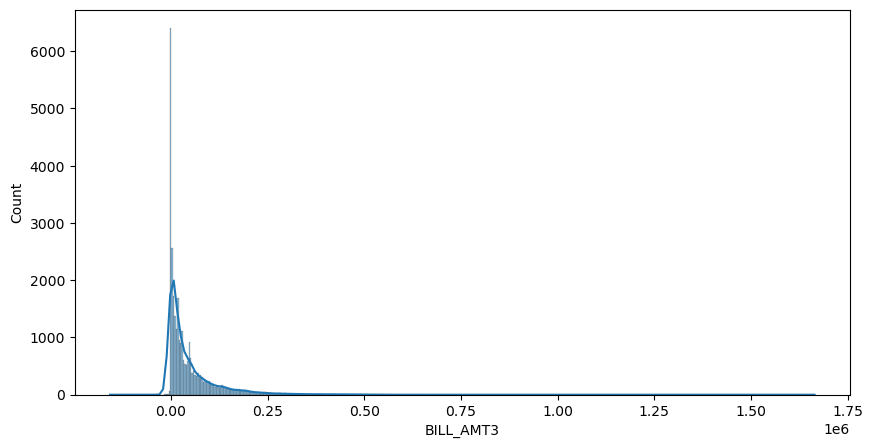

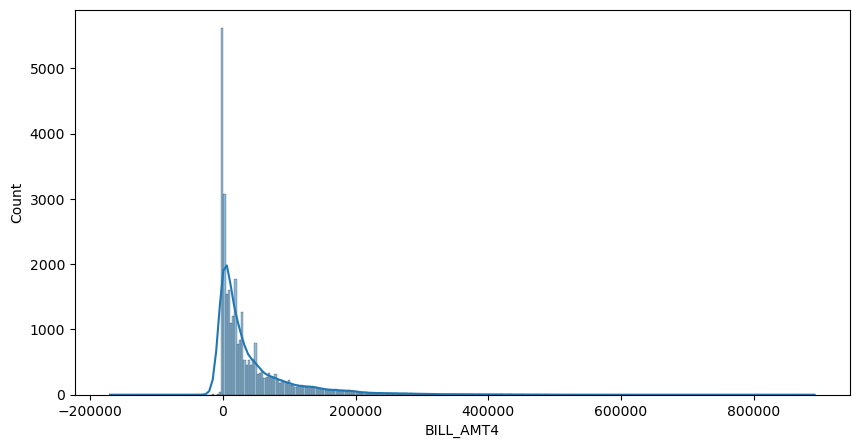

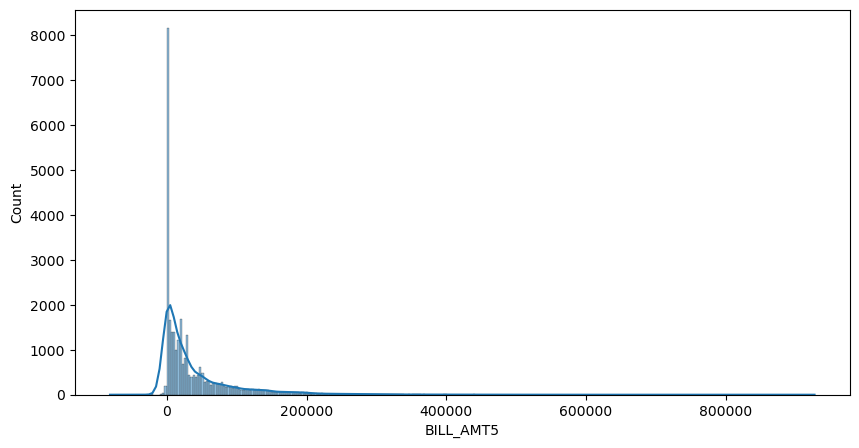

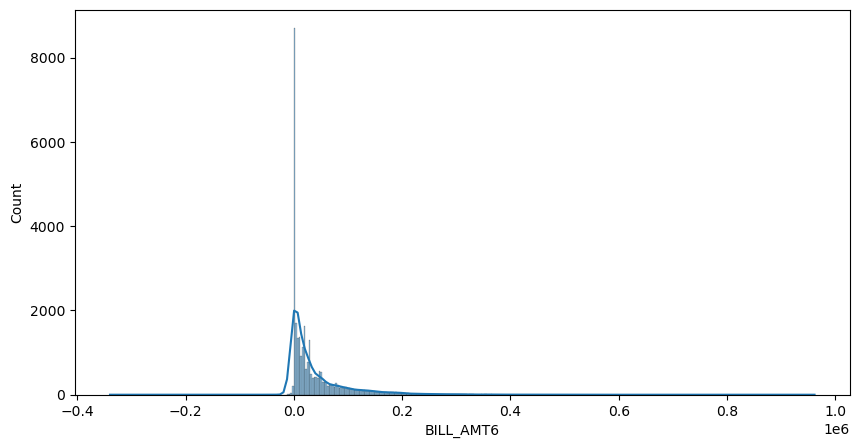

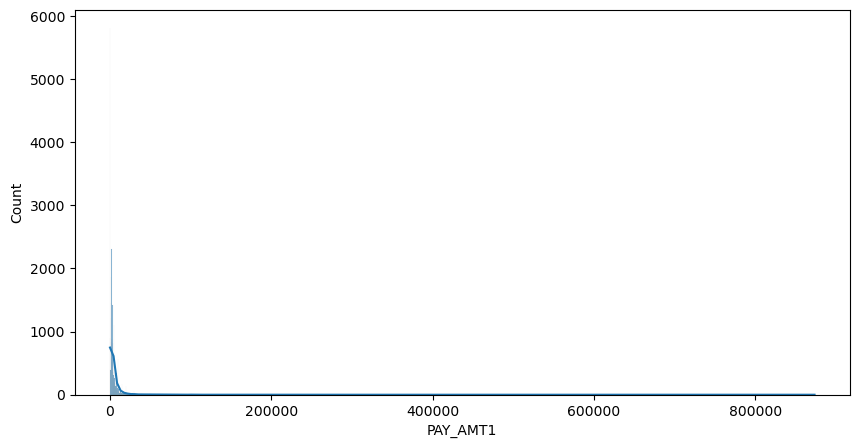

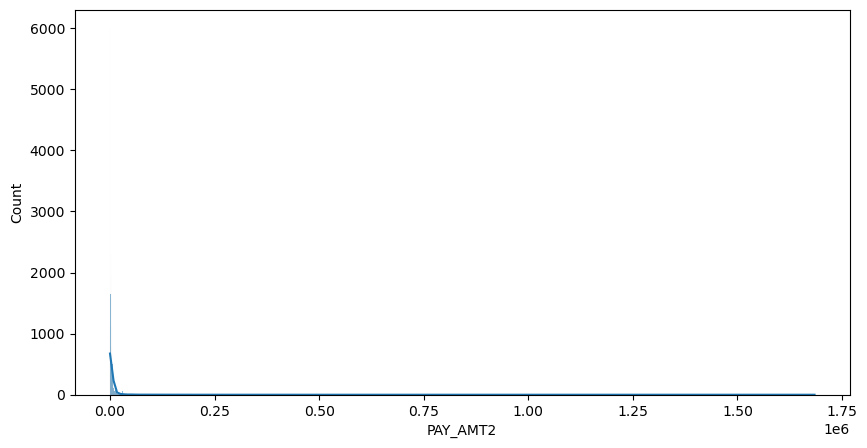

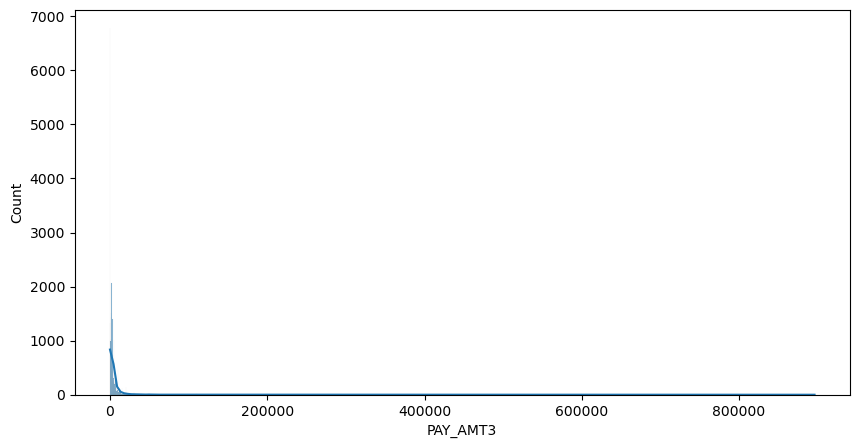

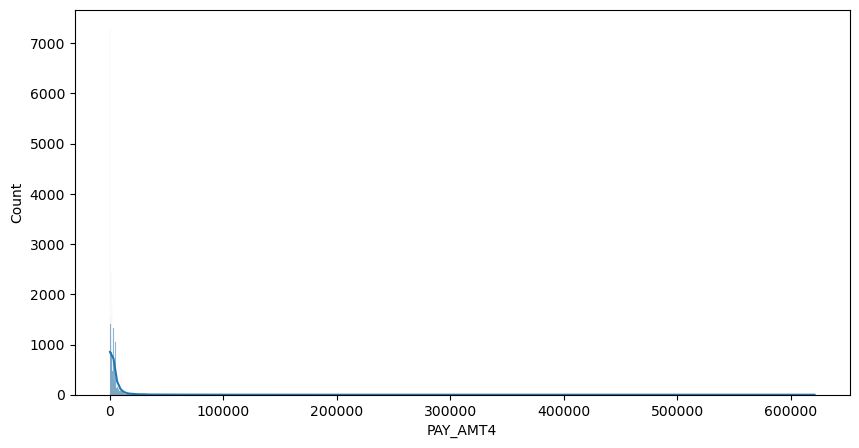

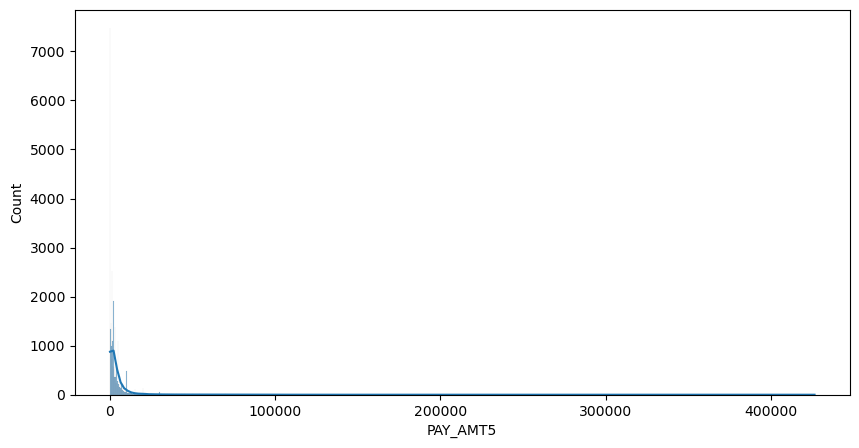

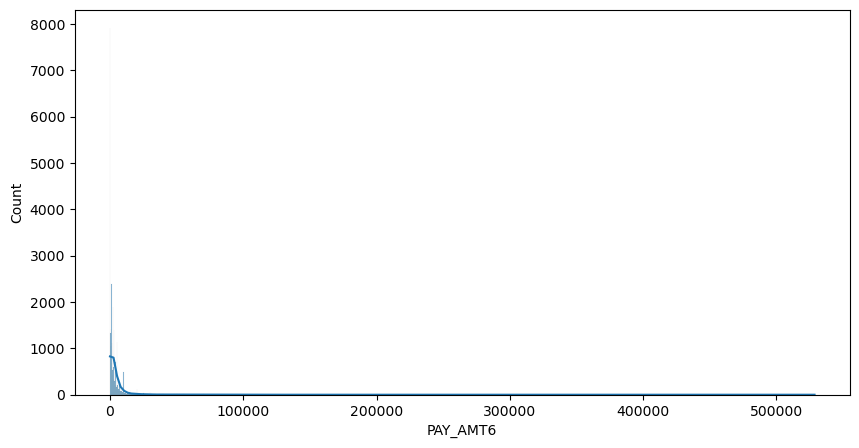

In [11]:
# Histogram plots of all the data

for column in X.columns:
    plt.figure(figsize=(10, 5))
    sns.histplot(X[column], kde=True)
    plt.show()
    # what does the histogram plot show in this context:
    # A histogram plot shows the distribution of a numerical variable across the dataset. 
    # In this case, the histogram plot shows the distribution of the numerical variable (LIMIT_BAL, AGE, etc.) across the entire dataset.

# Correlation Analysis

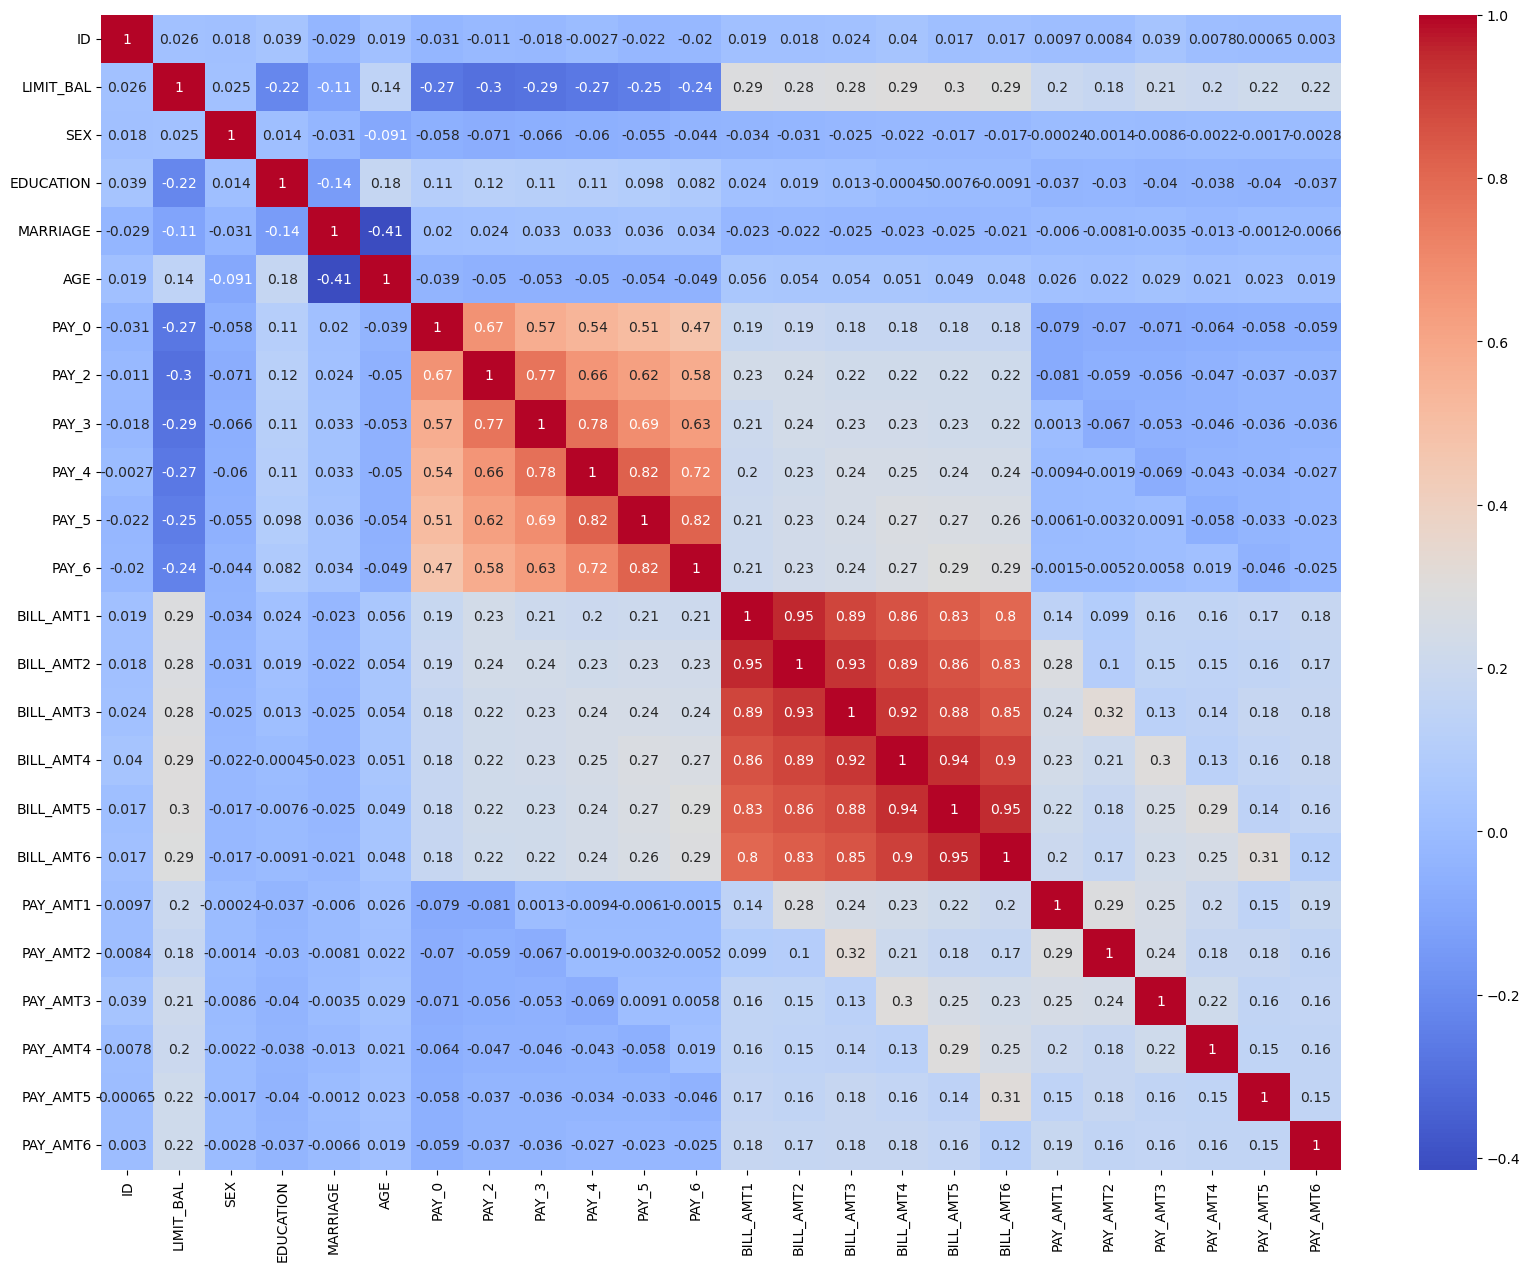

In [12]:
# Correlation Matrix

correlation_matrix = X.corr()
correlation_matrix

# Heatmap

plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()
    

# what does the heatmap show in this context:
    # A heatmap is a graphical representation of data where the individual values in a matrix are represented as colors. 
    # In this case, the heatmap shows the correlation between the numerical variables in the dataset.
    # The darker the color, the stronger the positive correlation, and the lighter the color, the stronger the negative correlation.
    # For example, the darkest blue (closest to 1) indicates a strong positive correlation between LIMIT_BAL and AGE,
    # and the darkest red (closest to -1) indicates a strong negative correlation between LIMIT_BAL and PAY_0.
    # The diagonal line represents the correlation between each variable with itself (i.e., the correlation of a variable with itself is always 1).
    # The variables with a strong positive correlation (e.g., LIMIT_BAL and AGE) might be useful for predicting the target variable (default_payment_next_month),
    # while the variables with a strong negative correlation (e.g., LIMIT_BAL and PAY_0) might not be useful for predicting the target variable.
    # Note: It's important to note that correlation does not imply causation. Correlation does not provide any information about the causal relationship between variables.

# Suitable Regression Model

# Input and Output Varaibles

In [13]:
# Create dataframe variables for the inputs (X) and the output (y). Display the two dataframes. 

X = df.drop('default_payment_next_month', axis=1)
y = df['default_payment_next_month']

X.head()

y.head()



0    1
1    1
2    0
3    0
4    0
Name: default_payment_next_month, dtype: int64

# Split the dataset into training and testing sets

In [14]:


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Regression Model

In [15]:
# Logistic Regression

model = LogisticRegression()

# Train the model

model.fit(X_train, y_train)



c:\Users\User\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

# Model Evaluation

# Prediction on Training and Test Data

In [16]:
# Calculate the predictions from the training and test data 

y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)
# display them in a simple way

y_pred_train[:5]

y_pred_test[:5]



array([0, 0, 0, 0, 0], dtype=int64)

# Evaluation of Training Data prediction

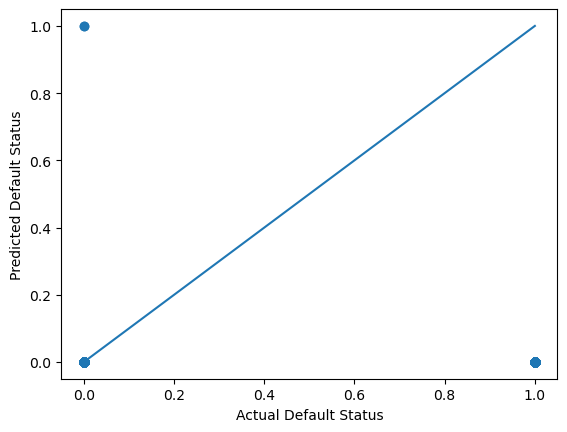

In [17]:
# Evaluation of Training data predciton vs actual training data in a sactterplot

plt.scatter(y_train, y_pred_train)
plt.xlabel('Actual Default Status')
plt.ylabel('Predicted Default Status')
# add a logistic line
fpr, tpr, thresholds = roc_curve(y_train, y_pred_train)
plt.plot(fpr, tpr)
plt.show()

# Training Data Metrics

In [18]:
# Calculate and print the metric to evaluate the performance of the training predictions 

accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_train



0.778125

# Evaluation of Testing Data prediction

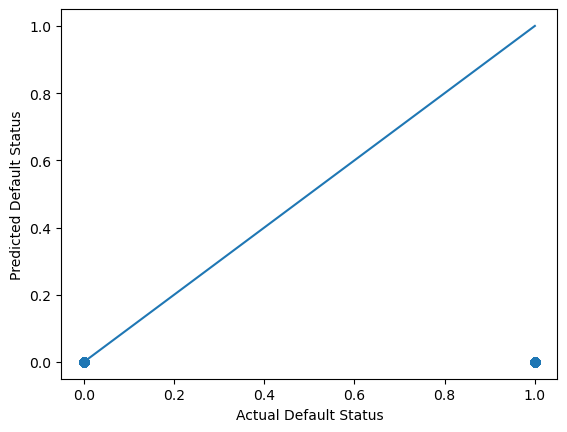

In [19]:
# Scatter plot actual test data vs predicted data

plt.scatter(y_test, y_pred_test)
plt.xlabel('Actual Default Status')
plt.ylabel('Predicted Default Status')
# add a suitable line

fpr, tpr, thresholds = roc_curve(y_test, y_pred_test)
plt.plot(fpr, tpr)
plt.show()



# Test Data metrics

In [20]:
# Test Data Metrics

accuracy_test = accuracy_score(y_test, y_pred_test)
accuracy_test


0.7811666666666667

# Prediction of the case

In [21]:
# Suitable full x point with feature names

full_x = df.drop('default_payment_next_month', axis=1).iloc[0]
full_x




ID               1
LIMIT_BAL    20000
SEX              2
EDUCATION        2
MARRIAGE         1
AGE             24
PAY_0            2
PAY_2            2
PAY_3           -1
PAY_4           -1
PAY_5           -2
PAY_6           -2
BILL_AMT1     3913
BILL_AMT2     3102
BILL_AMT3      689
BILL_AMT4        0
BILL_AMT5        0
BILL_AMT6        0
PAY_AMT1         0
PAY_AMT2       689
PAY_AMT3         0
PAY_AMT4         0
PAY_AMT5         0
PAY_AMT6         0
Name: 0, dtype: int64

# Predict the final case result

In [22]:


y_pred_full_case = model.predict([full_x.values.tolist()])
y_pred_full_case

# Display the prediction

if y_pred_full_case[0] == 0:
    print('The customer is not likely to default.')
else:
    print('The customer is likely to default.')
    

The customer is not likely to default.


c:\Users\User\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


# Reason why the customer is not likely to default



# The customer's features are not as extreme as the extreme values found in the dataset.